In [99]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.linear_model import LinearRegression
from statsmodels.distributions.empirical_distribution import ECDF

from tqdm import tqdm

# Task 1

In [100]:
def func(n, R):
    b1 = 1
    b2 = 0.5
    s2 = 3
    thetas = []
    ts = []
    for i in tqdm(range(R)):
        # generating data
        b = np.array([b1, b2])[:, np.newaxis]
        X = scipy.stats.norm.rvs(loc=0, scale=1, size=(n, 2))
        e = scipy.stats.norm.rvs(loc=0, scale=np.sqrt(s2), size=(n, 1))
        Y = X @ b + e

        # estimating betas
        b_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
        b0_hat = b_hat[0, 0]
        b1_hat = b_hat[1, 0]
        e_hat = Y - X @ b_hat
        e_hat_list = [element[0]**2 for element in e_hat]

        # calculating estimators and t-stats
        theta_hat = b0_hat / b1_hat
        theta = b1/b2

        Omega = np.diag(e_hat_list)
        V = X.T @ Omega @ X/n
        Qxx = X.T @ X/n
        beta_sandwich = np.array([(1/b1_hat), (-b0_hat/b1_hat**2)])[np.newaxis, :]

        t_theta = np.sqrt(n)*(theta_hat - theta)/(np.sqrt(beta_sandwich@np.linalg.inv(Qxx)\
        @V@np.linalg.inv(Qxx)@(beta_sandwich.T)))

        t_theta = t_theta[0][0]

        thetas.append(theta_hat)
        ts.append(t_theta)

    return np.array(thetas), np.array(ts)

In [101]:
n = 4
R = 10000

thetas, ts = func(n, R)

100%|██████████| 10000/10000 [00:14<00:00, 687.47it/s]


## Task 2

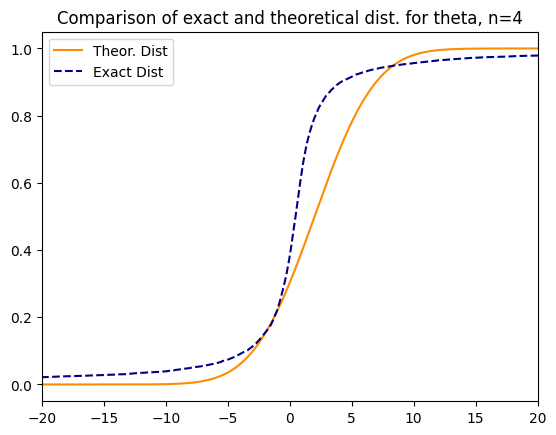

In [102]:
grid = np.linspace(thetas.min(), thetas.max(), 100000)

plt.plot(grid, stats.norm.cdf(grid, 2, (60 / n) ** 0.5),
         label='Theor. Dist', c='darkorange')
plt.plot(grid, ECDF(thetas)(grid), label='Exact Dist', linestyle='dashed', c = 'navy');
plt.legend();

lim = 20
plt.xlim((-lim, lim))


plt.title('Comparison of exact and theoretical dist. for theta, n=4');

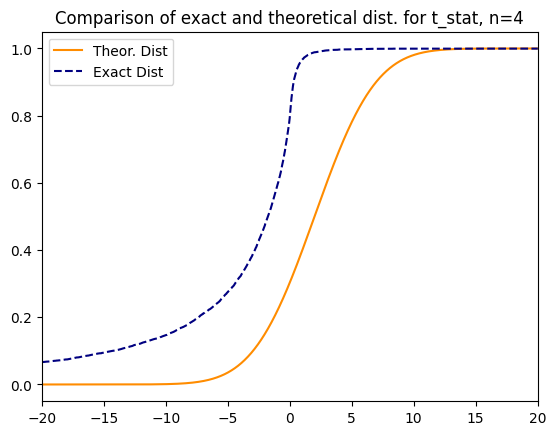

In [103]:
grid = np.linspace(ts.min(), ts.max(), 100000)

plt.plot(grid, stats.norm.cdf(grid, 2, (60 / n) ** 0.5),
         label='Theor. Dist', c='darkorange')
plt.plot(grid, ECDF(ts)(grid), label='Exact Dist', linestyle='dashed', c = 'navy');
plt.legend();

lim = 20
plt.xlim((-lim, lim))


plt.title('Comparison of exact and theoretical dist. for t_stat, n=4');

Approximation for $\theta$ works well. Conversely, $t$ is poorly approximated - there is a noticeable shift between exact and theoretical distributions.

# Task 3

In [104]:
n = 20

thetas20, ts20 = func(n, R)

100%|██████████| 10000/10000 [00:13<00:00, 744.78it/s]


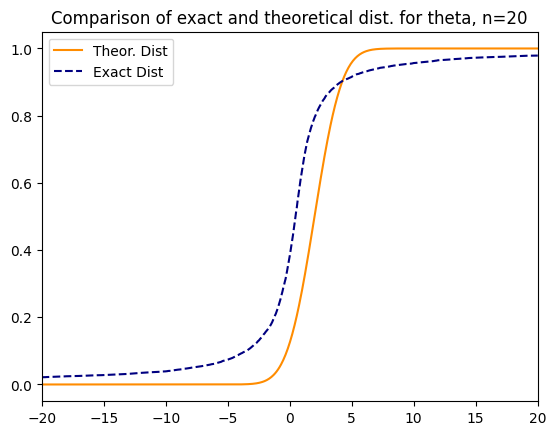

In [105]:
grid = np.linspace(thetas20.min(), thetas20.max(), 100000)

plt.plot(grid, stats.norm.cdf(grid, 2, (60 / n) ** 0.5),
         label='Theor. Dist', c='darkorange')
plt.plot(grid, ECDF(thetas)(grid), label='Exact Dist', linestyle='dashed', c = 'navy');
plt.legend();

lim = 20
plt.xlim((-lim, lim))


plt.title('Comparison of exact and theoretical dist. for theta, n=20');

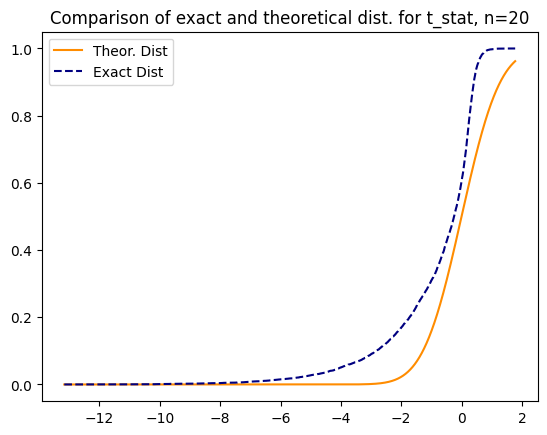

In [106]:
grid = np.linspace(ts20.min(), ts20.max(), 100000)

plt.plot(grid, stats.norm.cdf(grid),
         label='Theor. Dist', c='darkorange')
plt.plot(grid, ECDF(ts20)(grid), label='Exact Dist', linestyle='dashed', c = 'navy');
plt.legend();

plt.title('Comparison of exact and theoretical dist. for t_stat, n=20');

Usually we expect that as size of a sample increses, the quality of approximation should also improve due to the law of large numbers or CLT. Here we see that approximation for theta impoved significantly, but as for t-stat - there is a small still shift in medians, but overall situation has improved.


# Task 4

The degree of linearity has a significant impact on the accuracy of the approximation. In the case of a linear approximation using the Delta method, valuable information about the variable may be lost, but with a sufficiently large sample size, these nonlinearities can be eliminated due to convergence. However, strong nonlinearities may slow down the rate of convergence, and the convergence of the main $\beta$ parameters may also be slow, leading to poor approximation accuracy.
Consequently, due to the costs of linearization in small samples, the accuracy of the approximation can deteriorate significantly. This can be the case when the function being studied is nontrivial and exhibits nonlinear behavior with respect to the variables.
